In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
from import_file import *
load_libs()

# US ASOS Dataset

## Combining Files

In [2]:
# file_dir, save_file_dir = 'DEN', './data/asos/denver_CO'
# file_dir, save_file_dir = 'GJT', './data/asos/grand_junction_CO'
# file_dir, save_file_dir = 'PUB', './data/asos/pueblo_CO'
# file_dir, save_file_dir = 'COS', './data/asos/colorado_springs_CO'

# file_dir, save_file_dir = 'BIS', 'D:/data/asos/bismarck_ND' # slight different shape on hour avg
# file_dir, save_file_dir = 'FAR', './data/asos/fargo_ND' # 
# file_dir, save_file_dir = 'GFK', './data/asos/grand_forks_ND' 
# file_dir, save_file_dir = 'ISN', 'D:/data/asos/williston_ND'

# file_dir, save_file_dir = 'OLM', 'D:/data/asos/olympia_WA', # strong directionality; change of speed shapre, high 0 when avg
# file_dir, save_file_dir = 'SEA', './data/asos/seattle_WA' # strong directionality
# file_dir, save_file_dir = 'UIL', 'D:/data/asos/quillayute_WA' 

# file_dir, save_file_dir = 'SPI', 'D:/data/asos/springfield_IL'
# file_dir, save_file_dir = 'ORD', 'D:/data/asos/chicago_ohare_IL' 

# file_dir, save_file_dir = 'ABR', './data/asos/aberdeen_SD' # only to 2012
# file_dir, save_file_dir = 'MSP', './data/asos/minneapolis_MN'
# file_dir, save_file_dir = 'LNK', './data/asos/lincoln_NE' # slight transformation on hourly avg
# file_dir, save_file_dir = 'DSM', './data/asos/des_moines_IA'
file_dir, save_file_dir = 'TOP' , 'D:/data/asos/topeka_KS' # high 0 when averaging

# file_dir, save_file_dir = 'BWI' , 'D:/data/asos/baltimore_MD' # slight high 0 after averaging

In [3]:
convert_type = 'hr_avg'
# convert_type = '10min_avg'

In [4]:
from io import StringIO

fout = StringIO()
for year in range(2000,2017):
    for month in range(1,13):
        try: 
            for line in open('D:/1min采样间隔的数据/'+ str(year) + '/'+ file_dir +str(year)+"%02d"%(month)+".dat"):
                fout.write(line.replace("[", " ").replace("]", " ").replace('"', " ").replace('`', " "))
        except: 
            pass
all_data_file = fout.getvalue()
fout.close()

## Read from US 1 min

In [5]:
if file_dir in ["MSP", 'DEN', 'SEA', 'ORD']: 
    df = pd.read_csv(StringIO(all_data_file), skipinitialspace=True, error_bad_lines=False, sep=' ',
                    names = ['stationID','time','vis','day_type','vis2','day_type2','dir','speed','dir_max','speed_max','visual_range', 'unknown'])
elif  file_dir in ['BWI']:
    df= pd.read_csv(StringIO(all_data_file), skipinitialspace=True, error_bad_lines=False, sep=' ',
                names = ['stationID','time','vis','day_type','vis2','day_type2','dir','speed','dir_max','speed_max','visual_range', 'unknown2',  'unknown'])
else:
    df = pd.read_csv(StringIO(all_data_file), skipinitialspace=True, sep=' ', error_bad_lines=False,
                    names = ['stationID','time','vis','day_type','dir','speed','dir_max','speed_max','unname','visual_range', 'unknown'])

df

D:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (2,4,5,6,7,8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,stationID,time,vis,day_type,dir,speed,dir_max,speed_max,unname,visual_range,unknown
0,13996KTOP,TOP2000010100000600,0.093,N,176,3,165,4,NaN,NaN,NaN
1,13996KTOP,TOP2000010100010601,0.092,N,170,3,166,3,NaN,NaN,NaN
2,13996KTOP,TOP2000010100020602,0.093,N,168,3,162,3,NaN,NaN,NaN
3,13996KTOP,TOP2000010100030603,0.093,N,163,3,150,3,NaN,NaN,NaN
4,13996KTOP,TOP2000010100040604,0.093,N,150,2,136,2,NaN,NaN,NaN
5,13996KTOP,TOP2000010100050605,0.093,N,144,1,135,1,NaN,NaN,NaN
6,13996KTOP,TOP2000010100060606,0.094,N,135,1,108,1,NaN,NaN,NaN
7,13996KTOP,TOP2000010100070607,0.095,N,118,1,108,1,NaN,NaN,NaN
8,13996KTOP,TOP2000010100080608,0.095,N,117,1,137,1,NaN,NaN,NaN
9,13996KTOP,TOP2000010100090609,0.096,N,127,1,130,2,NaN,NaN,NaN


In [6]:
# Drop duplicate
df.drop_duplicates(subset='time', inplace=True)

# Drop too many field
df = df[df['unknown'].isnull()].copy()
df.drop('unknown', axis=1, inplace=True)

# Drop missing field
# Cannot use visual range, since some previous data lack of
df.dropna(subset=['vis', 'dir','speed','dir_max','speed_max'], inplace=True)

df

,stationID,time,vis,day_type,dir,speed,dir_max,speed_max,unname,visual_range
0,13996KTOP,TOP2000010100000600,0.093,N,176,3,165,4,NaN,NaN
1,13996KTOP,TOP2000010100010601,0.092,N,170,3,166,3,NaN,NaN
2,13996KTOP,TOP2000010100020602,0.093,N,168,3,162,3,NaN,NaN
3,13996KTOP,TOP2000010100030603,0.093,N,163,3,150,3,NaN,NaN
4,13996KTOP,TOP2000010100040604,0.093,N,150,2,136,2,NaN,NaN
5,13996KTOP,TOP2000010100050605,0.093,N,144,1,135,1,NaN,NaN
6,13996KTOP,TOP2000010100060606,0.094,N,135,1,108,1,NaN,NaN
7,13996KTOP,TOP2000010100070607,0.095,N,118,1,108,1,NaN,NaN
8,13996KTOP,TOP2000010100080608,0.095,N,117,1,137,1,NaN,NaN
9,13996KTOP,TOP2000010100090609,0.096,N,127,1,130,2,NaN,NaN


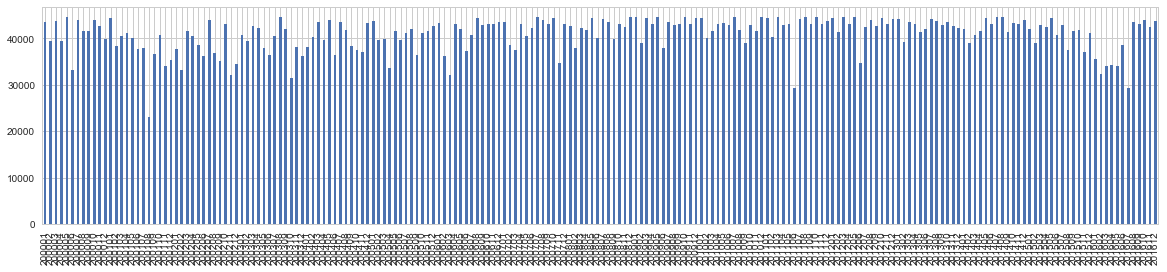

In [7]:
df['year_month'] = df['time'].apply(lambda x: x[3:9])
df['year_month'].value_counts().sort_index().plot(kind='bar', figsize=(20,4))

0          2
1      23959
2      24394
3      23706
4      24692
5      23537
6      23204
7      22849
8      22736
9      21921
10     21877
11     21781
12     21381
13     21286
14     20915
15     20741
16     20531
17     20511
18     20050
19     20135
20     19583
21     19276
22     18922
23     18989
24     18670
25     18205
26     18042
27     17895
28     17473
29     17367
       ...  
331    24152
332    24430
333    24246
334    24184
335    24483
336    24208
337    24399
338    24484
339    24421
340    24662
341    24517
342    24761
343    24834
344    24691
345    24555
346    24507
347    24324
348    24343
349    24071
350    23970
351    24033
352    23662
353    23508
354    23560
355    23768
356    24067
357    24150
358    24217
359    23456
360    23991
Name: dir, dtype: int64

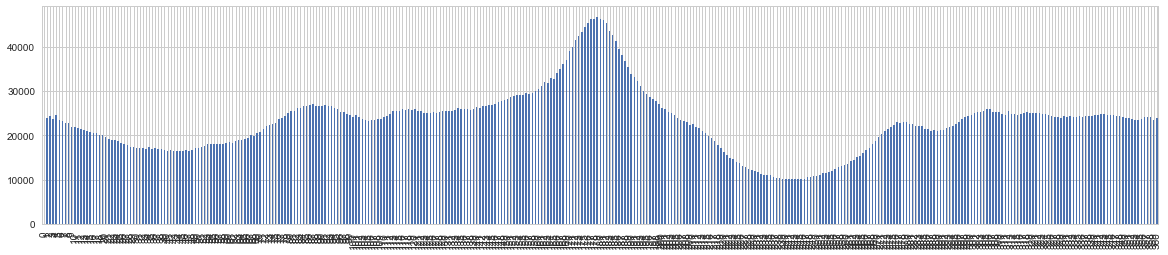

In [8]:
# Drop non-integer data for direction
df.dir = pd.to_numeric(df.dir, errors='coerce')  # Drop not a number
df = df[df.dir == df.dir // 1] # Drop not an integer
df = df[df['dir'].isin(arange(0,361))] # Drop not in range
df['dir'] = df['dir'].apply(lambda x: int(x)) # Convert back to integer
# Need to consider 0

display(df.dir.value_counts().sort_index())
df.dir.value_counts().sort_index().plot(kind='bar', figsize=(20,4))

0       257992
1       619173
2       653500
3       692880
4       737747
5       743844
6       712046
7       658020
8       597220
9       529428
10      457776
11      387344
12      317856
13      254975
14      200421
15      153013
16      114064
17       83870
18       60006
19       42295
20       28422
21       18686
22       12425
23        7633
24        4612
25        2844
26        1792
27        1054
28         652
29         419
         ...  
41           1
43           1
45           1
46           1
48           1
49           1
51           1
87           1
122          1
170          1
199          1
265          1
811          1
818          1
838          1
921          1
1022         1
1042         1
1446         1
1533         1
1600         1
1827         1
1836         1
1844         1
1847         1
1909         1
1924         1
2151         1
2159         1
2215         1
Name: speed, dtype: int64

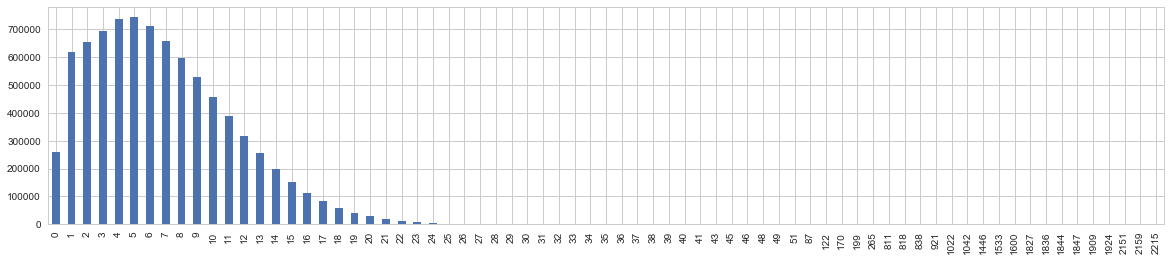

In [9]:
# Drop non-integer data for speed
df.speed = pd.to_numeric(df.speed, errors='coerce')
df = df[df.speed == df.speed // 1]
df['speed'] = df['speed'].apply(lambda x: int(x))

display(df.speed.value_counts().sort_index())
df.speed.value_counts().sort_index().plot(kind='bar', figsize=(20,4))

In [10]:
df.query('(speed > 100) | (speed <0 )')

,stationID,time,vis,day_type,dir,speed,dir_max,speed_max,unname,visual_range,year_month
219012,13996KTOP,TOP2000061208451445,0.098,D,17,1446,0.100,D,NaN,NaN,200006
219063,13996KTOP,TOP2000061209581558,0.075,D,19,1600,0.081,D,NaN,NaN,200006
219762,13996KTOP,TOP2000061302360836,0.131,N,17,838,0.133,N,NaN,NaN,200006
220242,13996KTOP,TOP2000061313061906,0.096,D,17,1909,0.089,D,NaN,NaN,200006
220253,13996KTOP,TOP2000061313221922,0.096,D,16,1924,0.094,D,NaN,NaN,200006
220356,13996KTOP,TOP2000061315482148,0.094,D,17,2151,0.087,D,NaN,NaN,200006
221373,13996KTOP,TOP2000061412431843,0.055,D,28,1844,0.055,D,NaN,NaN,200006
222494,13996KTOP,TOP2000061510471647,0.054,D,16,170,13,148,NaN,NaN,200006
826074,13996KTOP,TOP2001091903180918,0.884,N,27,921,0.870,N,NaN,NaN,200109
826130,13996KTOP,TOP2001091904391039,0.885,N,27,1042,0.811,N,NaN,NaN,200109


In [11]:
df = df.query('(speed <= 100)  & (speed >= 0)')
df = df[df['day_type'].str.contains("D|N") == True]
df['vis']=pd.to_numeric(df['vis'], errors='coerce')
df = df.dropna(subset=['vis'])

display(df.query('speed == 0'))
# Drop Dir 0?
display(df.query('dir == 0'))

,stationID,time,vis,day_type,dir,speed,dir_max,speed_max,unname,visual_range,year_month
43,13996KTOP,TOP2000010100430643,0.105,N,60,0,133,0,NaN,NaN,200001
44,13996KTOP,TOP2000010100440644,0.107,N,110,0,175,1,NaN,NaN,200001
107,13996KTOP,TOP2000010101470747,0.118,N,72,0,125,0,NaN,NaN,200001
108,13996KTOP,TOP2000010101480748,0.116,N,84,0,127,1,NaN,NaN,200001
232,13996KTOP,TOP2000010103520952,0.202,N,116,0,98,0,NaN,NaN,200001
233,13996KTOP,TOP2000010103530953,0.213,N,96,0,77,1,NaN,NaN,200001
238,13996KTOP,TOP2000010103580958,0.210,N,88,0,50,1,NaN,NaN,200001
6825,13996KTOP,TOP2000010608361436,0.116,D,86,0,86,0,NaN,NaN,200001
6826,13996KTOP,TOP2000010608371437,0.113,D,86,0,86,0,NaN,NaN,200001
6827,13996KTOP,TOP2000010608381438,0.112,D,86,0,86,0,NaN,NaN,200001


,stationID,time,vis,day_type,dir,speed,dir_max,speed_max,unname,visual_range,year_month
348278,13996KTOP,TOP2000091311371737,0.086,D,0,9,166,10,NaN,NaN,200009
1464300,13996KTOP,TOP2003021317102310,0.190,D,0,8,92,9,NaN,NaN,200302


In [12]:
# [1, 360] -> [0, 360]
df['dir']=df['dir'].apply(lambda x: x%360 if x <= 360 else x)

## Simple viz after data wrangling

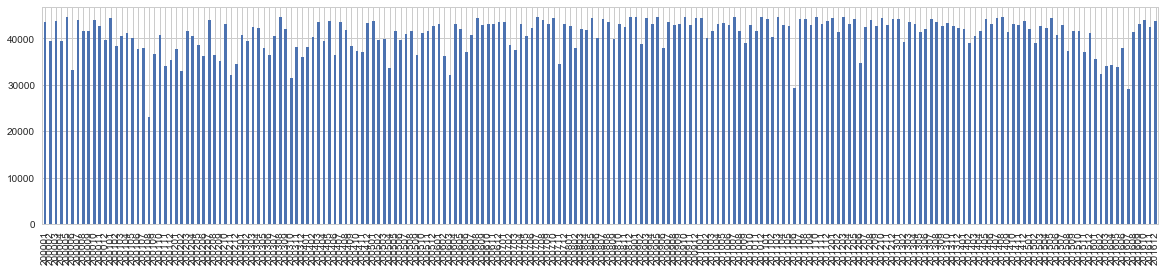

In [13]:
df['year_month'].value_counts().sort_index().plot(kind='bar', figsize=(20,4))

In [14]:
incre = 10
max_speed = 40
max_count = max_count_for_angles(df, 0, 360, incre)
plot_range = [0, max_speed, 0, max_count*1.05]

for angle in arange(0, 360, incre):
    start_angle, end_angle = angle-incre/2, angle+incre/2
    sub_df, sub_max_speed = select_df_by_angle(df, start_angle, end_angle)   
    
    fig = plt.figure()
    sub_df['speed'].hist(bins=arange(0, max_speed), alpha=0.5, label='Data')
    plt.axis(plot_range)
    plt_configure(figsize=(3,1.5), title='%s (%s - %s), %s' %(angle, start_angle, end_angle, len(sub_df)) )
align_figures()

D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAN4AAAB6CAYAAADQ6u1PAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAFQRJREFUeJzt3X1QlOX6B/DvLosvAyg2JHVK6gAi8b6omAfEqUwyJMG0
BNFOHNGYrNB0QAURwRNk6JSJ4XtRiJpLp9HK0EGdRDMI8QU0VwUlREDDQISF5fr9wfD8XFlgQeDZ
Xa/PDH/ss/e9e90LF/e9z3PvtRIiIjDG+pVU7AAYexRx4jEmAk48xkTAiceYCDjxGBMBJx5jIngk
Eq+pqQmrV6/GuHHjMG7cOHz88cdQq9Wd9qmrq0NAQABqamo6bLNy5UqMGjVK42f16tUdtr906RJm
z54Nd3d3+Pv749ixYz0eU5v//Oc/7WLYtm1bh+3z8vIQFBQENzc3vP766zh79qxw388//4xly5Z1
6/lbWlqwefNmTJo0CXK5HG+++Sby8/M12vzyyy947bXX4ObmhmnTpuHXX38V7mtubsYnn3wCHx8f
eHh4YN68ebhy5YpGf4VCAT8/P8jlcsycOROnTp3Suf+Dr03bT3fH2evoEZCUlEQvv/wyFRQU0PHj
x8nb25s2btzYaZ+EhAT64osvOm0za9YsSk1NpcrKSuGntrZWa9t79+6Rr68vxcbGklKppI0bN5Kr
qyuVlJT0eFxERBMmTKCsrCyNGOrr67W2raioILlcTp9++ikplUpatWoVjRs3ju7cuSO0ef311+nX
X3/V+fl37NhBXl5elJ2dTVevXqXk5GTy8PCgsrIyIiIqLi4mZ2dn2rhxI5WUlNDatWvJ09OTbt68
SURE69evp4kTJ9KJEyfoypUrtGjRInrxxRepqamJiIhyc3PJ1dWV9u/fT6WlpbR27Vry8PCgiooK
nfrf/7pUVlbSvn37yNnZmc6ePdv9F7sXGX3iNTQ0kLu7Ox06dEg4plAoaPz48aRWq7X2qaysJA8P
D6qpqen0sb28vOjo0aM6xZGVlUXjx48nlUolHAsNDaWkpCSd+mtTW1tLDg4OpFQqdWq/YcMGCgwM
FG63tLTQSy+9ROnp6RpxhoaG6hzD1KlTKS0tTePY5MmTaceOHUREtGjRInrnnXc0njMoKIiys7OJ
iCglJYV+/vln4f7i4mJycHCga9euEVHrP8CwsDCN/i4uLvTTTz/p1P9+d+/epQkTJtCmTZt0Hl9f
MfqlZnFxMe7duwcvLy/h2JgxY3Dr1i1cu3ZNa5/du3dDLpdj6NChHT5uVVUVampq8M9//lOnOH7/
/XfI5XKYmpoKx8aOHYuCggIdR9KeUqmETCaDjY2NTu0LCgowduxY4bZEIsHo0aM1YnjhhRdQUFCA
ixcv6vSYsbGxeO2119odr62tBQCcOHECU6ZM0XhOhUKBSZMmAQAWL16Ml19+GQBw584dfPXVV3j2
2Wfx5JNPAgCGDRuGwsJCnD9/HkQEhUIBIoKDg4NO/e+3Y8cOmJqaIiwsTKex9SWjT7ybN29i8ODB
sLCwEI49/vjjAICKigqtfY4cOYIJEyZ0+rhKpRISiQRbtmzBxIkT8eqrr2L79u1oaWnR2r6yshLD
hw/XOGZlZYWbN292ZzjtYjA3N0d0dDR8fHwwbdo0ZGVlddhelxiGDh0KV1dXHD16VKcYvLy88MQT
Twi3jxw5gpKSEowfPx61tbW4ffs2TE1NsXDhQvzrX/9CcHCw1n82W7duhZeXF/bv34/4+HjIZDIA
wNy5c+Hq6orp06fD2dkZMTExSE5ObvcPr6P+bRoaGvDll19iwYIFGDBggE5j60tGn3j37t3DwIED
NY61vfAqlapde7VajaKiItjb23f6uFeuXIFUKoWNjQ02b96MsLAwbNy4EVu3bu1WHNpi0NXly5fR
0NCA8ePHY+vWrQgMDERsbCwOHDjwUDHY29vj3Llz3Y5HqVQiKioKU6dOxZgxY3D37l0AQGJiohCj
q6sr/v3vf6OsrEyjr5+fHxQKBYKCghAREYHLly8DaP1nUVtbi9WrV2Pv3r146623sHLlSly6dEmn
/m32798PqVSKadOmdXtcfUHWdRPDNmjQoHZ/WG23Bw8e3K59TU0N1Go1hg0bJhybN2+expm6AwcO
ICQkBP7+/rC0tATQevbszp072LlzJ+bPn69zHIMGDdIat7+/P8rLy4Xb2maJJUuW4J133hGWxI6O
jrh+/TrS09Ph7+/f4xgsLS3bnVnsyrlz5xAeHo6RI0dizZo1ACDMOlOnTsXs2bMBAE5OTjh58iT2
7t2LRYsWCf1HjBgBAFi1ahXy8/Px7bffIioqCnFxcfD29sabb74JAHB2dkZRURG2bduGpKSkLvu3
+eGHHzBlypR2/3jEYvSJ98QTT6C+vh51dXUwNzcH0Pr+DACsra3btZdIJACgsWRcs2YNGhoahNvD
hw+HRCIRkq6Nvb09qquroVarYWJionGftbW18LxtqqqqtMYAAJs3b0Zzc3OnYzMxMWn3PtTOzg5H
jhzR2l7XGNRqNaRS3RdDv/32GxYsWAB3d3ekpqYKiWxpaQlTU9N2qwdbW1uUl5ejpaUFOTk5cHFx
EWKQSCSws7PDX3/9BQA4e/YsQkNDNfq7uLigsLBQp/4AUF9fj1OnTiE8PFznMfU1o19qOjo6YvDg
wRozVl5eHqysrLSelBg2bBhkMpnGL87a2hrPPPOM8COTybBmzRq8/fbbGn3PnTuHZ599tl3SAYBc
LkdBQYFGMuXl5UEul2uN+6mnntJ4Tm0WLlyIFStWaBw7f/48bG1ttbaXy+XIy8sTbhORcNLnfn/9
9ZfwPrgrFy5cwPz58zF27FikpaVprCJkMhnc3d1x/vx5jT6XL1/GiBEjIJVKsXr1aigUCuE+tVqN
4uJiIVmtra2hVCo1+iuVStjY2OjUHwCKiopARPD09NRpTP1C3JOq/SMhIYFefPFFysvLo9zcXPL2
9u70Gt2MGTPanSJ/0MmTJ8nR0ZHS0tKotLSUsrKyyMPDg/73v/8REVFzczNVVlbSvXv3iIiorq6O
vL29KTo6mpRKJaWmppKbm5vW0966ysrKIicnJ/r222+ptLSUdu7cSc7OzvTbb78REVFjYyNVVlZS
Y2MjERHduHGD3N3dKSUlhZRKJcXHx9Pzzz9Pf//9t8bjBgUF0fbt24mo9fpjZWUlNTc3a40hMDCQ
Jk+eTGVlZVqvZ+bk5JCzszNlZmZSSUkJJScnk7u7O12/fp2IiLZs2UKenp6UnZ1NSqWSoqOjydvb
W4hp586d5OHhIVzHS0tLIycnJyouLtapPxHR119/TZMnT+7x69wXJESG8UHYB3dDdIdKpcKXX36J
kydPwtTUFL6+vpg1a1aHyymFQoFLly5pvEfQ5tSpU1AoFLhx4waGDRuGgIAAvPTSSwBal3AffPAB
FixYgIkTJwIASkpKsH37dpSWlsLa2hqhoaFwc3Pr8bgA4NChQ/jxxx9RXV0Na2trzJw5U7hkUFRU
hMTERMTExMDJyQlA66z81Vdf4ebNm7CxscHbb7+tMUPW19djwYIF+Pjjj/Hkk0/i6NGjSEtLw6ef
ftpuFqyoqMDixYu1xuXv7y+8r8vNzcW+fftQXV2NESNGIDQ0FI6OjgBal/T79+/H4cOHUVNTAwcH
B7z11lt4+umnAbTOygcPHkR2djZu376Np556CsHBwXB2dtapPwDs3bsXZ8+e7XRXUW8YPXq07o1F
Tnyd5eXl9dtzVVRUkLu7O1VVVXW7b3/G+TA6ijMzM5Pmzp2rcSw8PLxHr0VvMPTXsyNG/x6vJ6yt
rREUFITdu3eLHUq/IiLs2rULERERwrHff/8dUqkUVlZWIkZmfDjxOrB48WL88MMPnW6SNjY//fQT
HBwc8Pzzzwv

In [15]:
# Create Output csv

df['HrMn'] = df['time'].apply(lambda x: x[11:15])
df['date'] = df['time'].apply(lambda x: x[3:11])
df['time'] = df['date'].apply(lambda x: x[3:])

# df=df[['stationID','date','HrMn', 'vis','day_type','dir','speed','dir_max','speed_max']]
df=df[['stationID','date','HrMn', 'dir','speed','speed_max']]

In [16]:
# df.to_csv(save_file_dir + '/minute_avg.csv', index=False, float_format='%.2f')

## US 1 min to Hour avg

In [17]:
print(file_dir, convert_type)

TOP hr_avg


In [18]:
## Output format: date, HrMn, dir, speed, speed_max

if 'df' not in globals():
    df = pd.read_csv(save_file_dir + '/minute_avg.csv', header=0, skipinitialspace=True, dtype={'HrMn': object})

df['date']=pd.to_numeric(df['date'], errors='coerce')
df['speed']=pd.to_numeric(df['speed'], errors='coerce')
df['dir']=pd.to_numeric(df['dir'], errors='coerce')
df = df.dropna()
df=df[['date','HrMn','dir','speed']]
df

,date,HrMn,dir,speed
0,20000101,0000,176,3
1,20000101,0001,170,3
2,20000101,0002,168,3
3,20000101,0003,163,3
4,20000101,0004,150,2
5,20000101,0005,144,1
6,20000101,0006,135,1
7,20000101,0007,118,1
8,20000101,0008,117,1
9,20000101,0009,127,1


In [19]:
df['Hr']=df['HrMn'].apply(lambda x: int(str(x)[:-2]))
df['x'] = df['speed'] * cos(df['dir'] * pi / 180.0)
df['y'] = df['speed'] * sin(df['dir'] * pi / 180.0)

In [20]:
if convert_type != '10min_avg':
    # 1. Hourly avg
    ## This would make all 0 speed in to 0 speed, 0 dir, need more elaborate
    temp_df = df.groupby(['date', 'Hr']).agg({'x' : np.mean,'y': np.mean}).reset_index()
    temp_df['HrMn']=temp_df['Hr'].apply(lambda x: "%02d00"%x)
else:
    # 2. 10 min average
    df['time']=pd.to_datetime(df["date"].astype(str).map(str) + df["HrMn"], format='%Y%m%d%H%M')
    temp_df = df.resample(rule='10Min', on='time').mean()
    temp_df['HrMn']=temp_df.index.strftime('%H%M')
    temp_df['date']=temp_df.index.strftime('%Y%m%d').astype(int)
    temp_df = temp_df.reset_index().drop(['time'], 1)

# Regain speed, dir
temp_df['speed']=np.sqrt(temp_df.x**2 + temp_df.y**2)
temp_df['dir']=np.degrees(np.arctan2(temp_df.y, temp_df.x))%360
temp_df.drop(['Hr', 'x','y'], 1, inplace=True)

In [21]:
df.describe()

,date,dir,speed,Hr,x,y
count,8.349185e+06,8.349185e+06,8.349185e+06,8.349185e+06,8.349185e+06,8.349185e+06
mean,2.008153e+07,1.796284e+02,6.825891e+00,1.150735e+01,-6.176191e-01,4.228611e-02
std,4.846464e+04,1.006749e+02,4.519476e+00,6.925915e+00,6.533037e+00,4.894348e+00
min,2.000010e+07,0.000000e+00,0.000000e+00,0.000000e+00,-3.730183e+01,-3.435695e+01
25%,2.004061e+07,9.900000e+01,3.000000e+00,5.000000e+00,-4.531539e+00,-2.631345e+00
50%,2.008091e+07,1.740000e+02,6.000000e+00,1.200000e+01,-1.046719e-01,1.570079e-01
75%,2.012101e+07,2.720000e+02,1.000000e+01,1.800000e+01,2.938926e+00,2.988584e+00
max,2.016123e+07,3.590000e+02,8.700000e+01,2.300000e+01,8.615332e+01,3.799421e+01


In [22]:
temp_df.describe()

,date,speed,dir
count,1.402250e+05,140225.000000,140225.000000
mean,2.008146e+07,6.618023,180.103012
std,4.853721e+04,4.354299,100.477702
min,2.000010e+07,0.000000,0.000000
25%,2.004053e+07,3.156157,99.608152
50%,2.008090e+07,6.022133,174.204696
75%,2.012101e+07,9.435678,273.716485
max,2.016123e+07,36.640721,359.998452


### Time Comparison

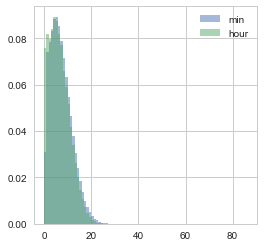

In [23]:
bins=arange(0,df.speed.max())
df['speed'].hist(bins=bins, normed=True,alpha=0.5,label='min')
temp_df['speed'].hist(bins=bins, normed=True,alpha=0.5,label='hour')
plt_configure(legend=True, figsize=(4,4))

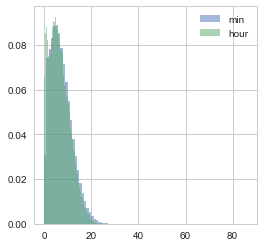

In [24]:
# 高频是因为断缺，当时间断只有1个数据, 所以成了整数

df['speed'].hist(bins=arange(0,df.speed.max()), normed=True,alpha=0.5,label='min')
temp_df['speed'].hist(bins=arange(0, temp_df.speed.max(), 0.1), normed=True,alpha=0.5,label='hour')
plt_configure(legend=True, figsize=(4,4))

In [26]:
# df[(df['time'] > '2016-12-06 00:00:00') & (df['time'] < '2016-12-06 17:00:00')]

In [27]:
temp_df.query('speed == 1')

,date,HrMn,speed,dir
44032,20050714,0200,1.0,259.0


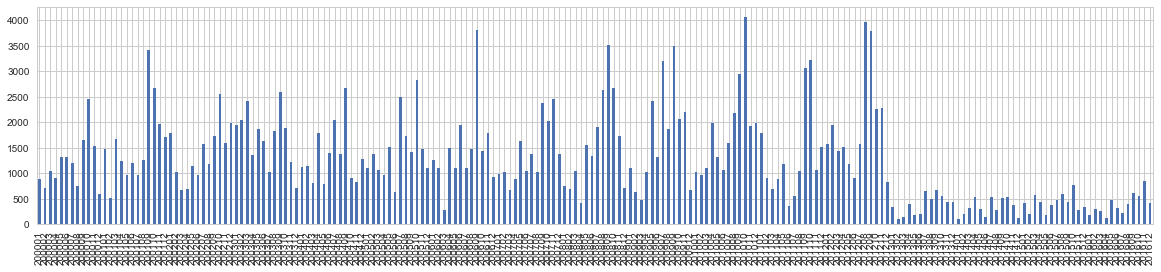

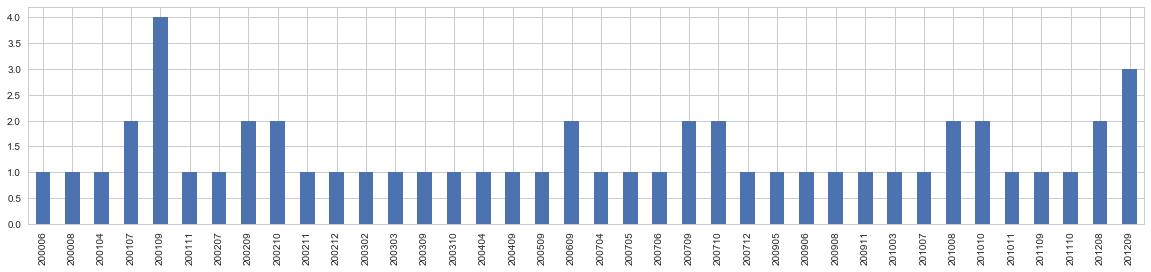

In [28]:
# Check for existance of 0 speed/dir after avg
for df_ in [df, temp_df]:
    plt.figure()
    df_.query('speed == 0')['date'].apply(lambda x: str(x)[0:6]).value_counts().sort_index().plot(kind='bar', figsize=(20,4))

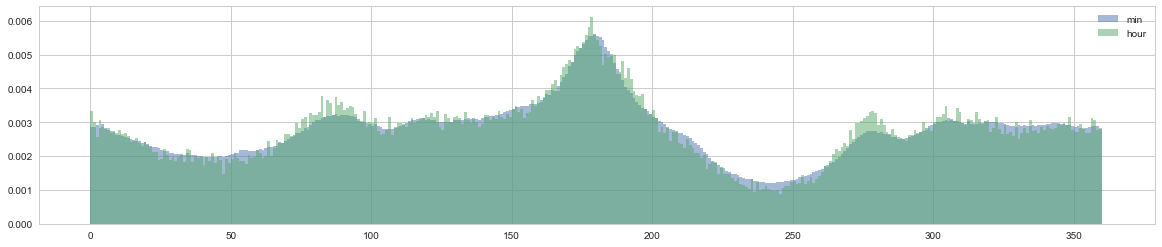

In [29]:
bins=arange(0,362)
df['dir'].hist(bins=bins, normed=True,alpha=0.5,label='min')
temp_df['dir'].hist(bins=bins, normed=True,alpha=0.5,label='hour')
plt_configure(legend=True, figsize=(20,4))

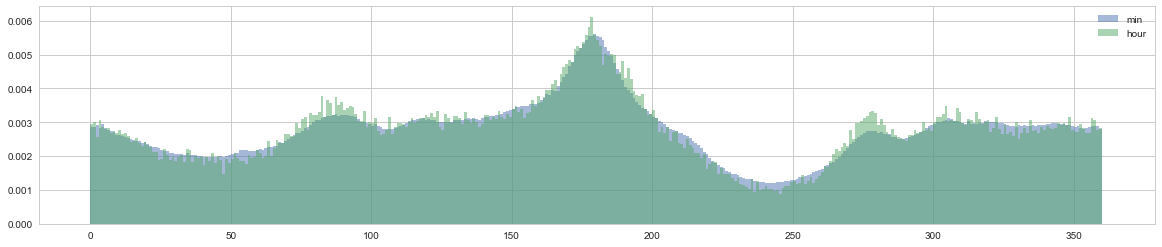

In [30]:
temp_df.ix[(temp_df['dir'] == 0) & (temp_df['speed']==0), 'dir'] =np.nan
temp_df['dir'].interpolate(inplace=True)

bins=arange(0,362)
df['dir'].hist(bins=bins, normed=True,alpha=0.5,label='min')
temp_df['dir'].hist(bins=bins, normed=True,alpha=0.5,label='hour')
plt_configure(legend=True, figsize=(20,4))

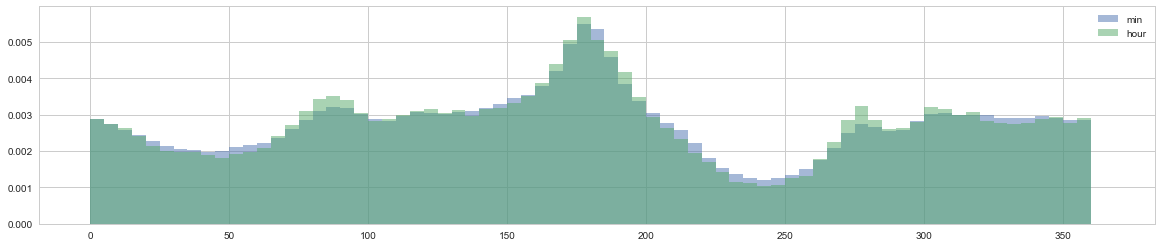

In [31]:
bins=arange(0,370,5)
df['dir'].hist(bins=bins, normed=True,alpha=0.5,label='min')
temp_df['dir'].hist(bins=bins, normed=True,alpha=0.5,label='hour')
plt_configure(legend=True, figsize=(20,4))

### Resample Comparison

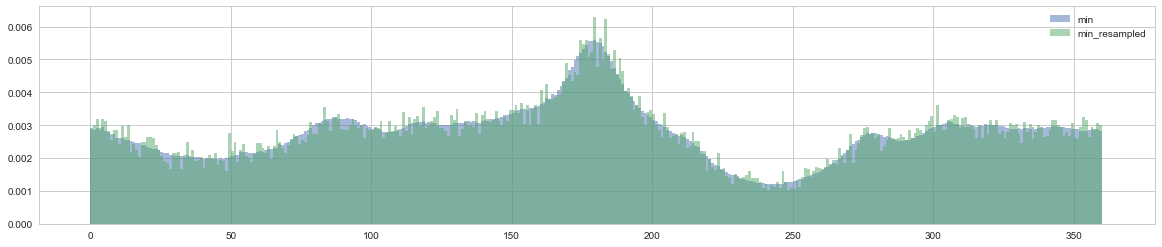

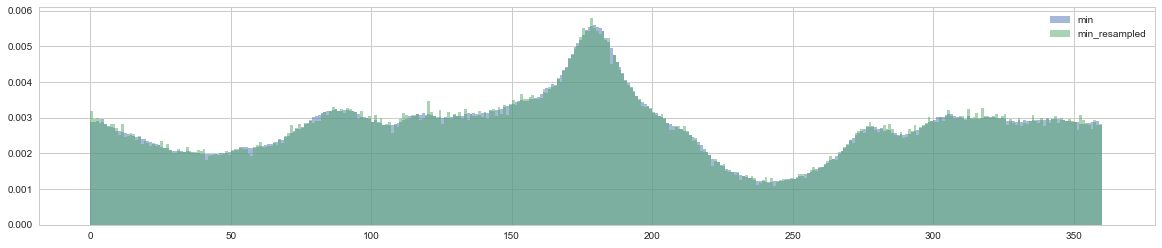

In [32]:
bins=arange(0,362)
for sample_size in [50000, 300000]:
    plt.figure()
    df['dir'].hist(bins=bins, normed=True,alpha=0.5,label='min')
    df.sample(n=sample_size, replace=True)['dir'].hist(bins=bins, normed=True,alpha=0.5,label='min_resampled')
    plt_configure(legend=True, figsize=(20,4))

### Direction Comparison

In [33]:
incre = 10
max_speed = temp_df.speed.max()

for angle in arange(0, 360, incre):
    start_angle, end_angle = angle-incre/2, angle+incre/2
    sub_df, _ = select_df_by_angle(df, start_angle, end_angle)
    sub_df_hourly, _ = select_df_by_angle(temp_df, start_angle, end_angle)   

    fig = plt.figure()
    bins = arange(0, max_speed)
    sub_df['speed'].hist(bins=bins, alpha=0.5, label='min', normed=True)
    sub_df_hourly['speed'].hist(bins=bins, alpha=0.5, label='hour', normed=True)
    plt.gca().set_xlim([0, max_speed])
    plt_configure(figsize=(3,1.5), legend=True, title='%s (%s - %s), %s/%s' %(angle, start_angle, end_angle, len(sub_df),len(sub_df_hourly)))
align_figures()

D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAANYAAAB6CAYAAADDPa27AAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAGb5JREFUeJztnXlQVFf2x7+NIKKgWIPiiiiKCMgibgxRJyqiUSOgRImM
C0rA0oxLOQE1uIFb1DiWgwy4oWZ+bqR1atwRDVZAQBAVgUQaAUVZo43sS3N+f1C84dENNMqDBu+n
iireffe8d87rPn23c88TERGBwWC0KmrtrQCD0RlhjsVgCABzLAZDAJhjMRgCwByLwRAA5lgMhgCo
nGNVVVVh586dmDBhAiZMmIAffvgBMpmsSZni4mLMnTsXUqm00Tpbt27FyJEjeX87d+5stH5qaioW
L14MS0tLzJ49G/fv3/9gm+pYsWKFnA4nTpxotH5cXBycnJxgYWGB+fPnIzExkTt3+/ZtbNq0qUX3
r6mpQXBwMKZPnw5ra2ssXLgQ8fHxvDq//vorvvzyS1hYWGDevHmIiYnhzlVXV+PAgQP47LPPYGVl
hZUrV+LFixc8ebFYDAcHB1hbW8PFxQWxsbFKyzd8NnV/De1cuHAh4uLieGXPnz+Hubk5T18ACAsL
w8yZM2FhYYElS5YgMzOTd97BwUHufjdv3lTKniYhFWPv3r1kb29PCQkJFBkZSXZ2dhQQENCkjJ+f
H/3rX/9qss6iRYvo6NGjlJeXx/0VFRUprFtWVkaTJ08mX19fkkgkFBAQQKNHj6aMjIwPtouIaNKk
SXT58mWeDqWlpQrr5uTkkLW1NR0+fJgkEglt376dJkyYQIWFhVyd+fPnU0xMjNL3P3XqFI0fP57C
wsIoPT2d9u3bR1ZWVpSVlUVERCkpKWRmZkYBAQGUkZFB+/fvpzFjxlBubi4RER06dIimTJlCDx48
oBcvXtD69etp6tSpVFVVRUREUVFRNHr0aLp69SplZmbS/v37ycrKinJycpSSr/9c8vLy6OeffyYz
MzNKTEzkbHj//j2NHTuWkyEiqq6uJmdnZzI2Nqbo6GiuPCkpiczNzemnn36i58+f07fffksODg6c
bEVFBY0aNYoePHjAu29FRYVS9jSFSjlWeXk5WVpa0p07d7gysVhMtra2JJPJFMrk5eWRlZUVSaXS
Jq89fvx4ioiIUEqPy5cvk62tLVVWVnJlbm5utHfvXqXkFVFUVETGxsYkkUiUqn/kyBFydHTkjmtq
amjatGl09uxZnp5ubm5K6zBnzhwKCgrilc2YMYNOnTpFRETr168nLy8v3j2dnJwoLCyMiIgOHjxI
t2/f5s6npKSQsbExvXz5kohqf+Dc3d158ubm5nTz5k2l5OtTUlJCkyZNosDAQF75rVu3yNPTk1cW
GBhIixcvlnMsHx8fWr16Ne+aVlZWdPfuXe7+I0eObPTHrTl7mkKluoIpKSkoKyvD+PHjubKxY8fi
jz/+wMuXLxXKXLhwAdbW1ujVq1ej183Pz4dUKsXQoUOV0uPRo0ewtraGhoYGVzZu3DgkJCQoaYk8
EokE6urqMDAwUKp+QkICxo0bxx2LRCLY2NjwdPj888+RkJCA33//Xalr+vr64ssvv5QrLyoqAgA8
ePAAs2bN4t1TLBZj+vTpAIANGzbA3t4eAFBYWIgzZ87A0NAQ/fv3BwD07t0bT548QVJSEogIYrEY
RARjY2Ol5Otz6tQpaGhowN3dnVceGRmJzz77jDtOTU3F6dOnsWPHDrlrNHyG3bt3h5mZGR4/fgwA
SEtLQ//+/aGlpaXweTVnT1OoN1ujDcnNzYWWlhZ0dHS4sj59+gAAcnJyYGhoKCfzyy+/YPbs2U1e
VyKRQCQS4dixY4iIiECPHj2wYMECLFu2DGpq8r8teXl5ch+2np4ecnNzP8Cq/+mgra0NHx8fxMTE
4E9/+hOWLVsGJycnhfXz8vJga2srp8OTJ0+44169emH06NGIiIjAyJEjm9Wh/g8WUPvsMjIyYGtr
i6KiIrx9+xYaGhpYs2YNHj16hCFDhuC7776DtbU1T+748ePYv38/NDU1ERwcDHX12q/RkiVLEBcX
B2dnZ3Tp0gVEhAMHDsj9oDUmX0d5eTlOnz6NjRs3omvXrrxzkZGRWLp0KQBAJpPBx8cHa9euRb9+
/eTszc3NRd++feWeYU5ODoDaz6Rr167w8vJCYmIiBg4ciNWrV2PKlCktskcRKtVilZWVQVNTk1dW
92ArKyvl6stkMiQnJ2P48OFNXvfFixdQU1ODgYEBgoOD4e7ujoCAABw/frxFeijSQVnS0tJQXl4O
W1tbHD9+HI6OjvD19cW1a9c+Sofhw4fj2bNnLdZHIpHA29sbc+bMwdixY1FSUgIA8Pf353QcPXo0
li1bhqysLJ6sg4MDxGIxnJycsGrVKqSlpQGo/TEoKirCzp07cenSJSxduhRbt25FamqqUvJ1XL16
FWpqapg3bx6v/NWrV5DJZBg2bBiAWgfV1tbGwoULFdpYXl7e5DNMS0tDYWEhnJ2dcfz4cdja2sLL
ywuPHj1qkT2KUKkWq1u3bnJfnLpjRc21VCqFTCZD7969ubKVK1fyZrquXbuGr7/+GrNnz4auri6A
2tmnwsJChISE4JtvvlFaj27duinUe/bs2Xjz5g13rKjLuHHjRnh5eXFdVhMTE7x69Qpnz55V2OIq
q4Ourq7czFxzPHv2DB4eHhgxYgR27doFAFyrMWfOHCxevBgAYGpqiujoaFy6dAnr16/n5AcPHgwA
2L59O+Lj4xEaGgpvb29s27YNdnZ23BfdzMwMycnJOHHiBPbu3dusfB3Xr1/HrFmz5Jzi119/xZ//
/GcAtT8MJ0+eRGhoKEQikUI7G3uGdd+lgwcPoqKiAtra2gCAUaNG4bfffsO///1vjBkzRml7FKFS
jtWvXz+UlpaiuLiYMzY/Px8AoK+vL1e/7oHW1NRwZbt27UJ5eTl33LdvX4hEIs6p6hg+fDgKCgog
k8nQpUsX3jl9fX3uvnXk5+cr1AEAgoODUV1d3aRtXbp0kRsHGhkZ4ZdfflFYX1kdZDKZwu5sYzx8
+BCenp6wtLTE0aNHOUfV1dWFhoaGXOs/bNgwvHnzBjU1Nbh37x7Mzc05HUQiEYyMjPDu3TsAQGJi
Itzc3Hjy5ubmePLkiVLyAFBaWorY2Fh4eHjI6R4VFcWNAW/evImioiK5MaOHhwccHR2xc+fORp9h
3bhLQ0ODN44Gaj+TumWNpuxpDpXqCpqYmEBLS4vX4sTFxUFPT0/hoL93795QV1fnfTD6+voYMmQI
96euro5du3Zh+fLlPNlnz57B0NBQzqkAwNraGgkJCTxniYuLkxtr1DFw4EDePRWxZs0abNmyhVeW
lJTEdWsU6VB/rYaIuEmV+rx7944bhzbHb7/9hm+++Qbjxo1DUFAQrxegrq4OS0tLJCUl8WTS0tIw
ePBgqKmpYefOnRCLxdw5mUyGlJQUzhn19fUhkUh48hKJBAYGBkrJA0BycjKICGPGjOFdRyaTITY2
lht3urm54caNG7hy5QquXLmCc+fOAajtyq5du1bhMywtLUVycjL3DJ2dnfHPf/6Td5/6n0lT9jRL
s/OGbYyfnx9NnTqV4uLiKCoqiuzs7Jpco1qwYIHcFHJDoqOjycTEhIKCgigzM5MuX75MVlZW9J//
/IeIatdB8vLyqKysjIiIiouLyc7Ojnx8fEgikdDRo0fJwsJC4bSwsly+fJlMTU0pNDSUMjMzKSQk
hMzMzOjhw4dEVLumUn8NJTs7mywtLengwYMkkUhox44dNHHiRHr//j3vuk5OTnTy5Ekiql1/y8vL
o+rqaoU6ODo60owZMygrK0vhet69e/fIzMyMzp8/TxkZGbRv3z6ytLSkV69eERHRsWPHaMyYMRQW
FkYSiYR8fHz

2001 - 2005


D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\__init__.py:938: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


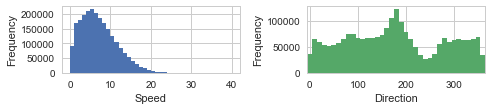

2006 - 2010


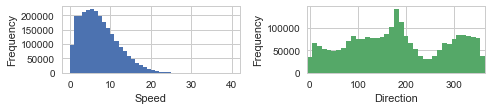

2011 - 2015


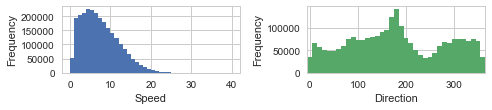

2016 - 2016


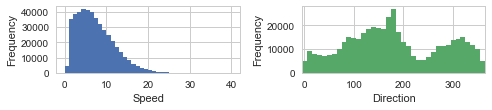

2001 - 2005


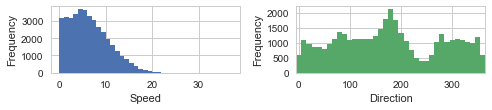

2006 - 2010


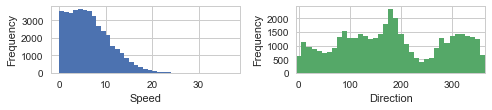

2011 - 2015


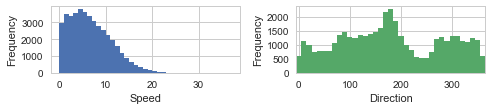

2016 - 2016


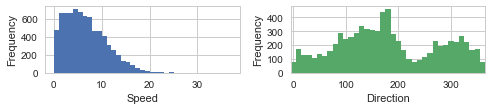

In [34]:
check_time_shift(df)
check_time_shift(temp_df)

In [35]:
import time
current_file = 'file_format.ipynb'
output_file = 'D:/output_HTML/{}_stats_{}.html'.format(file_dir, convert_type) 
save_notebook()
output_HTML(current_file, output_file)

In [36]:
temp_df.to_csv('{}/{}.csv'.format(save_file_dir, convert_type), index=False, float_format='%.2f')

In [37]:
sss

NameError: name 'sss' is not defined

# US NDBC

## Formatting Files

In [ ]:
from io import StringIO

station_id = '44013'
# '46086', '42057', '46014', 'cdrf1', '46081', '44013'

file_path = 'D:/NDBC/{}'.format(station_id)
fout=StringIO()
fout.write('YY MM DD hh mm dir speed GDR GST GTIME\n')
for time in arange(2000, 2017):
    try:
        file_name = "{}/{}.txt".format(file_path, time)
        for line in open(file_name):
            if 'MM DD' in line or 'mo dy' in line:
                pass
            else:
                fout.write(line)    
    except: 
        print('No data available at {}'.format(time))
        pass
all_data_file = fout.getvalue()
fout.close()

In [ ]:
df = pd.read_csv(StringIO(all_data_file), skipinitialspace=True, error_bad_lines=False, sep=' ', 
                 dtype={'YY': object, 'MM': object, 'DD': object, 'hh': object, 'mm': object})
df

In [ ]:
df['date']=df['YY']+df['MM']+df['DD']
df['HrMn']=df['hh']+df['mm']
save_file = "{}/10_min.csv".format(file_path)
df[['date','HrMn','dir','speed']].to_csv(save_file, index=False, float_format='%.2f')

In [ ]:
sss

## Download Files

In [ ]:
import os
import urllib.request 

for station_id in [ '44013']:
#     '46086', '42057', '46014', 'cdrf1', '46081',
    print("http://www.ndbc.noaa.gov/station_history.php?station={}".format(station_id))
    file_path = 'D:/NDBC/{}'.format(station_id)
    if not os.path.exists(file_path):
        os.makedirs(file_path)
    for time in arange(1990, 2017):
        try:
            url = "http://www.ndbc.noaa.gov/view_text_file.php?filename={}c{}.txt.gz&dir=data/historical/cwind/".format(station_id,time)
            file_name = "{}/{}.txt".format(file_path, time)
            urllib.request.urlretrieve(url, file_name)
        except: 
            print('No data available at {}'.format(time))
            pass

In [ ]:
sss

# ECMWF Dataset

In [27]:
# file_path='D:/data/10_metre_U_wind_component_surface.txt'
# save_file = 'D:/data/10_U.csv'
file_path='D:/data/10_metre_V_wind_component_surface.txt'
save_file = 'D:/data/10_V.csv'
df = pd.read_csv(file_path, sep='\t')

In [28]:
# df.query('lat > 48.1 & lat < 49 & lon >98 & lon < 99' ).to_csv(save_file, index=False)
temp_df = df.query('lat > 47.1 & lat < 48 & lon >102.1 & lon < 103' )
temp_df

,time,lat,lon,10_metre_V_wind_component_surface
37,0.0,47.250004,102.750008,2.153482
97,6.0,47.250004,102.750008,1.218175
157,12.0,47.250004,102.750008,2.441749
217,18.0,47.250004,102.750008,2.244252
277,24.0,47.250004,102.750008,3.121306
337,30.0,47.250004,102.750008,2.596274
397,36.0,47.250004,102.750008,-0.889317
457,42.0,47.250004,102.750008,0.657865
517,48.0,47.250004,102.750008,1.556118
577,54.0,47.250004,102.750008,-1.960465


In [29]:
temp_df.to_csv(save_file, index=False)

In [ ]:
sss

In [ ]:
# file_path='47N123W.csv'
# file_path='8N293E.csv'
# file_path='./data/ECMWF/chile/52S75W/dat.csv'
# file_path='65N17W.csv'
# file_path='./data/ECMWF/sudan/18N32E/dat.csv'
file_path='./data/ecmwf/china/24N121E/dat.csv'
# file_path='37S142E.csv'

df = pd.read_csv(file_path, header=0, skipinitialspace=True)
df.rename(columns={'U':'x','V':'y'}, inplace=True)
df['speed']=np.sqrt(df.x**2+df.y**2)
df['dir']=np.degrees(np.arctan2(df.y, df.x))%360
df['time']=pd.to_datetime('1979-01-01T00:00:00Z')+pd.to_timedelta(df['time'], unit='h')
df['date']=df['time'].dt.strftime('%Y%m%d')
df['HrMn']=df['time'].dt.strftime('%H00')
df.set_index(['time'], inplace=True)

df

In [ ]:
sub_df =df['2011':'2015']
plot(sub_df.x, sub_df.y, '.', alpha=0.5)

plt.figure()
bins=arange(0,361)
df['dir'].hist(bins=bins)

In [ ]:
np.degrees(np.arctan2(-3, 5))%360

In [ ]:
df.x = -df.x
df.y = -df.y
df['dir']=np.degrees(np.arctan2(df.y, df.x))%360

In [ ]:
sub_df =df['2011':'2015']
df.head()

In [ ]:
plot(sub_df.x, sub_df.y, '.', alpha=0.5)

In [ ]:
bins=arange(0,df.speed.max(),0.5)
df['speed'].hist(bins=bins)

plt.figure()
bins=arange(0,361)
df['dir'].hist(bins=bins)

In [ ]:
df['x'] = df['speed'] * cos(df['dir'] * pi / 180.0)
df['y'] = df['speed'] * sin(df['dir'] * pi / 180.0)

In [ ]:
sub_df =df['2011':'2015']
plot(sub_df.x, sub_df.y, '.', alpha=0.5)

In [ ]:
sss

# 2. NDAWN Dataset

In [ ]:
# file_dir = 'D:/NDAWN/fargo/'
# file_dir = 'D:/NDAWN/grand_forks/'
# file_dir = 'D:/NDAWN/williston/'
# file_dir = 'D:/NDAWN/jamestown/'
# file_dir = 'D:/NDAWN/minot/'
file_dir = './data/NDAWN/dickinson/'

file_path = file_dir+'table.csv'
save_file_path  = file_dir+'hr_avg.csv'
df = pd.read_csv(file_path, skipinitialspace=True, dtype={'Year':'object', 'Month':'object', 
                                                          'Day':'object'})
df

In [ ]:
df.describe()

In [ ]:
## Output format: date, HrMn, dir, speed, speed_max
df['HrMn']=df['Hour'].apply(lambda x: "%04d"%x ) 
df['date']=df['Year']+df['Month']+df['Day']
df = df[['date','HrMn','Avg Wind Speed', 'Max Wind Speed', 'Avg Wind Dir', 'Avg Wind Dir SD']]
df.rename(columns={'Avg Wind Speed': 'speed', 'Max Wind Speed': 'speed_max', 
                   'Avg Wind Dir': 'dir', 'Avg Wind Dir SD': 'dir_std'}, inplace=True)

In [ ]:
df

In [ ]:
## too slow, need optimization
import datetime as dt

def my_to_datetime(date_str):
    if date_str[8:10] != '24':
        return pd.to_datetime(date_str, format='%Y%m%d%H%M')

    date_str = date_str[0:8] + '00' + date_str[10:]
    return pd.to_datetime(date_str, format='%Y%m%d%H%M') + \
           dt.timedelta(days=1)
   
df['time']=df["date"].astype(str).map(str)+df["HrMn"]
df['time']=df['time'].apply(my_to_datetime)
df['date']=df['time'].apply(lambda x: x.strftime('%Y%m%d'))
df['HrMn']=df['time'].apply(lambda x: x.strftime('%H%M'))

In [ ]:
df.speed.value_counts().sort_index()

In [ ]:
bins=arange(0,df['speed'].max())
df['speed'].hist(bins=bins, normed=True,alpha=0.5,label='min')
plt_configure(legend=True)

plt.figure()
bins=arange(0,362)
df['dir'].hist(bins=bins, normed=True,alpha=0.5,label='min')
plt_configure(legend=True, figsize=(20,4))

In [ ]:
df.to_csv(save_file_path, index=False, float_format='%.2f')

In [ ]:
sss

# 3. Read from Chinese Data sets

In [ ]:
import csv

ipath= "./data/NCDC/cn/上海/上海/dat.txt"
uipath = unicode(ipath , "utf8")

with open(uipath) as fin, open('./data/NCDC/test.txt', 'w') as fout:
    o=csv.writer(fout)
    for line in fin:
        o.writerow(line.split())